<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [3]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113901 entries, 0 to 113900
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    113901 non-null  float64
 1   Header_Length    113897 non-null  float64
 2   Protocol Type    113894 non-null  float64
 3   Duration         113893 non-null  float64
 4   Rate             113892 non-null  float64
 5   Srate            113891 non-null  float64
 6   Drate            113891 non-null  float64
 7   fin_flag_number  113890 non-null  float64
 8   syn_flag_number  113890 non-null  float64
 9   rst_flag_number  113890 non-null  float64
 10  psh_flag_number  113890 non-null  float64
 11  ack_flag_number  113890 non-null  float64
 12  ece_flag_number  113890 non-null  float64
 13  cwr_flag_number  113889 non-null  float64
 14  ack_count        113889 non-null  float64
 15  syn_count        113889 non-null  float64
 16  fin_count        113888 non-null  floa

In [4]:
print(data['label'].nunique())

34


In [4]:
print(data['label'].unique())

['BenignTraffic' 'DDoS-ICMP_Flood' 'DDoS-UDP_Fragmentation'
 'DDoS-UDP_Flood' 'Mirai-greip_flood' 'DDoS-SYN_Flood' 'DoS-TCP_Flood'
 'Mirai-udpplain' 'DoS-UDP_Flood' 'DDoS-SynonymousIP_Flood'
 'DDoS-PSHACK_Flood' 'DDoS-RSTFINFlood' 'DDoS-TCP_Flood' 'DoS-SYN_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-HostDiscovery' 'Mirai-greeth_flood'
 'DDoS-ACK_Fragmentation' 'DNS_Spoofing' 'DDoS-SlowLoris' 'Recon-OSScan'
 'DictionaryBruteForce' 'Recon-PortScan' 'MITM-ArpSpoofing'
 'VulnerabilityScan' 'DoS-HTTP_Flood' 'CommandInjection' 'DDoS-HTTP_Flood'
 'Backdoor_Malware' 'XSS' 'Recon-PingSweep' 'SqlInjection'
 'BrowserHijacking' 'Uploading_Attack' nan]


In [5]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 1


In [6]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913537 entries, 0 to 4913537
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [9]:
print(data['label'].nunique())

34


In [ ]:
print(data['label'].unique())

['DoS-TCP_Flood' 'DoS-UDP_Flood' 'DDoS-UDP_Flood'
 'DDoS-SynonymousIP_Flood' 'DDoS-RSTFINFlood' 'DDoS-TCP_Flood'
 'DDoS-PSHACK_Flood' 'DDoS-ICMP_Fragmentation' 'DNS_Spoofing'
 'BenignTraffic' 'Mirai-greeth_flood' 'DoS-SYN_Flood' 'DDoS-ICMP_Flood'
 'DDoS-SYN_Flood' 'Mirai-udpplain' 'DoS-HTTP_Flood' 'MITM-ArpSpoofing'
 'Mirai-greip_flood' 'Recon-HostDiscovery' 'DDoS-ACK_Fragmentation'
 'Recon-PortScan' 'DDoS-UDP_Fragmentation' 'DDoS-HTTP_Flood'
 'DictionaryBruteForce' 'Recon-OSScan' 'BrowserHijacking' 'DDoS-SlowLoris'
 'VulnerabilityScan' 'CommandInjection' 'SqlInjection' 'Uploading_Attack'
 'XSS' 'Backdoor_Malware' 'Recon-PingSweep' 'D']


In [8]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

In [9]:
# Assuming your DataFrame is named df
binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1, 'DDoS-SynonymousIP': 1, 'DD': 1, 'DDoS-': 1,
                  'DoS-UDP_Flo': 1, 'DDoS': 1 }

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [12]:
print(data['label'].nunique())

2


In [10]:
print(data['label'].unique())

[0 1]


In [11]:
total_benign_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'BenignTaffic' :", total_benign_traffic_rows)


Total rows with label 'BenignTaffic' : 115586


# Data Analysis

# Model Training

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]


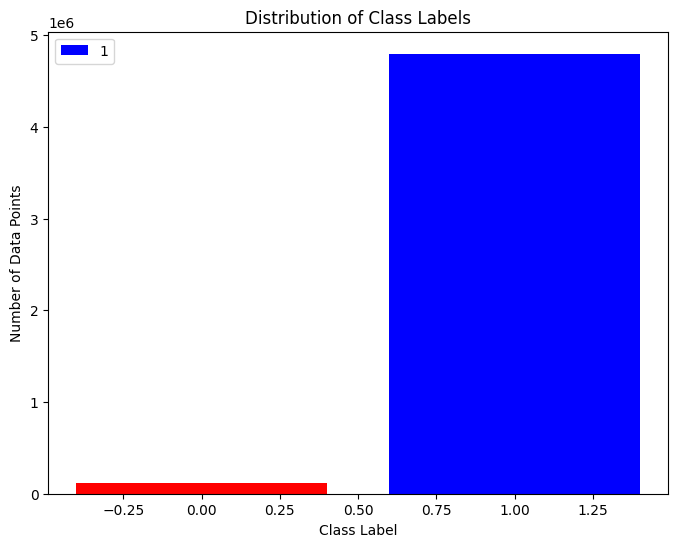

In [13]:

# Count occurrences of each class
class_counts = Y.value_counts()

# Define colors for each class
colors = ['blue', 'red']  # Adjust colors as needed

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel("Class Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Class Labels")

# Add a legend if needed
plt.legend(class_counts.index, loc='upper left')

plt.show()


In [ ]:
# Check class imbalance
print(Y.value_counts())

<Axes: ylabel='label'>

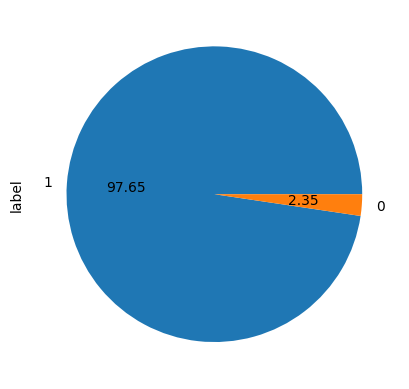

In [14]:
Y.value_counts().plot.pie(autopct="%.2f")

In [ ]:
from imblearn.over_sampling import ADASYN
ros = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
X_ros , Y_ros = ros.fit_resample(X,Y)


In [19]:
print(Y_ros.value_counts())

1    111265
0    110968
Name: label, dtype: int64


<Axes: ylabel='label'>

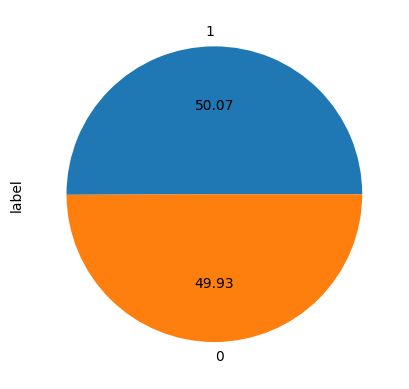

In [20]:
Y_ros.value_counts().plot.pie(autopct="%.2f")

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_ros)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(177786, 46)
(44447, 46)
(177786,)
(44447,)


In [23]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)


# Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.9741939838459288
Recall: 0.9741968963489207
Precision: 0.9741937413343507
F1 Score: 0.9741939336324532


In [25]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22281
           1       0.97      0.98      0.97     22166

    accuracy                           0.97     44447
   macro avg       0.97      0.97      0.97     44447
weighted avg       0.97      0.97      0.97     44447



# Confusion Matrix

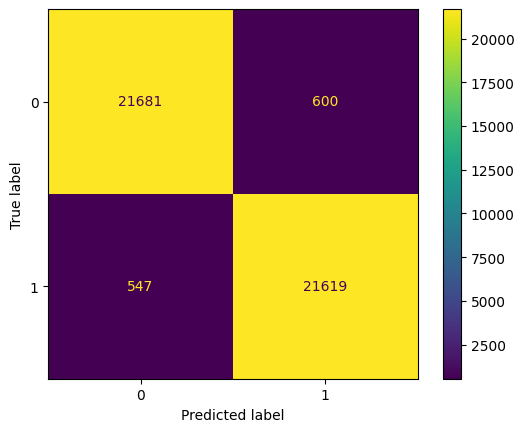

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.show()


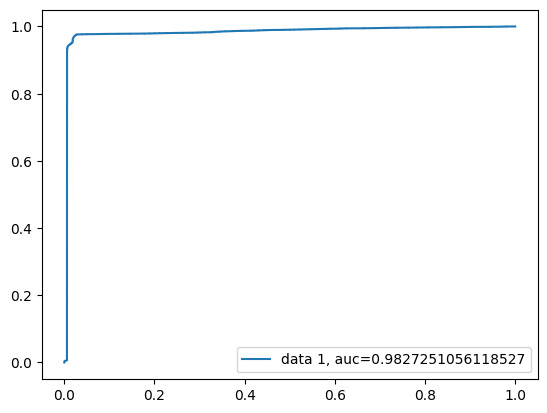

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plotting the ROC curve and calculating AUC score
# 0(worst) to 1(best) -> 0.98 score


# Creating a Mesh Grid from 2 features

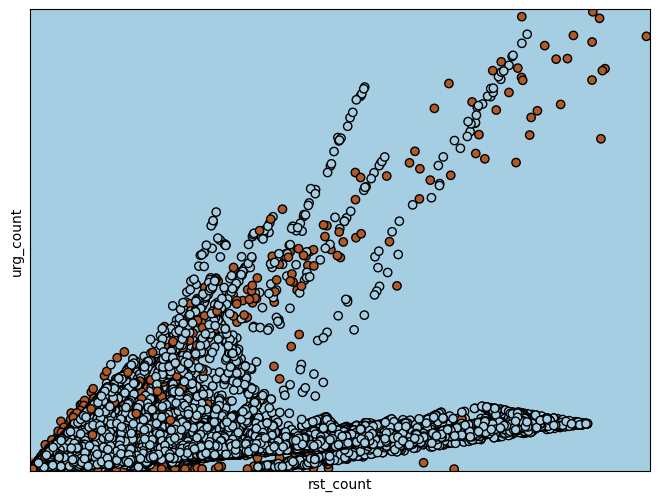

In [28]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_ros and Y_ros are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the data
logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train[['rst_count', 'urg_count']], Y_train)

# Create a scatter plot with decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    logistic_regression_model,
    X_train[['rst_count', 'urg_count']],  # Use Telnet on the x-axis and Tot size on the y-axis
    cmap=plt.cm.Paired,
    ax=plt.gca(),
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="rst_count",
    ylabel="urg_count",
    eps=0.5,
)

# Plot training points
plt.scatter(X_train['rst_count'], X_train['urg_count'], c=Y_train, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()


# Feature Importance Graph from Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [41]:
# Make predictions on the test set
Y_pred_rf = rf_model.predict(X_test)




In [1]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf, average='macro'))

NameError: name 'Y_test' is not defined

In [43]:
from sklearn.metrics import classification_report

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22281
           1       1.00      1.00      1.00     22166

    accuracy                           1.00     44447
   macro avg       1.00      1.00      1.00     44447
weighted avg       1.00      1.00      1.00     44447



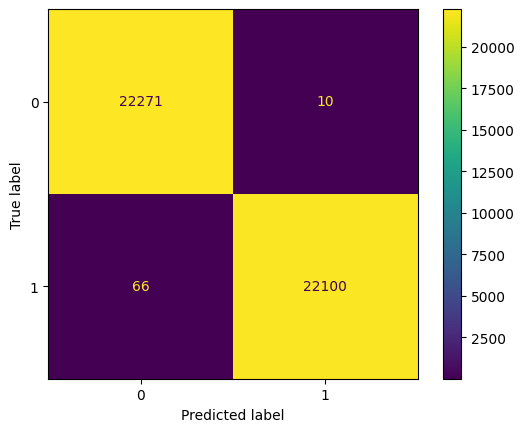

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(Y_test, Y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()


# Mesh Daigram for 2 features of Random Forest

In [45]:
X_train_new = X_train[["urg_count", "rst_count"]]
X_test_new=X_test[["urg_count", "rst_count"]]

In [47]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model_new = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model_new.fit(X_train_new, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [49]:
# Make predictions on the test set
Y_pred_rf_new = rf_model_new.predict(X_test_new)




In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf_new))
print("Recall:", recall_score(Y_test, Y_pred_rf_new, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf_new, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf_new, average='macro'))

Accuracy: 0.988120683060724
Recall: 0.988102208402797
Precision: 0.9882368480293804
F1 Score: 0.9881195659352828


# Popular Features

In [34]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the most important features
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


Top 10 Important Features (Random Forest):
            Feature  Importance
18        rst_count    0.240178
17        urg_count    0.145750
0     flow_duration    0.085775
38         Tot size    0.063236
42           Radius    0.060908
41         Magnitue    0.047558
36              AVG    0.046923
37              Std    0.046316
11  ack_flag_number    0.044276
44         Variance    0.035435


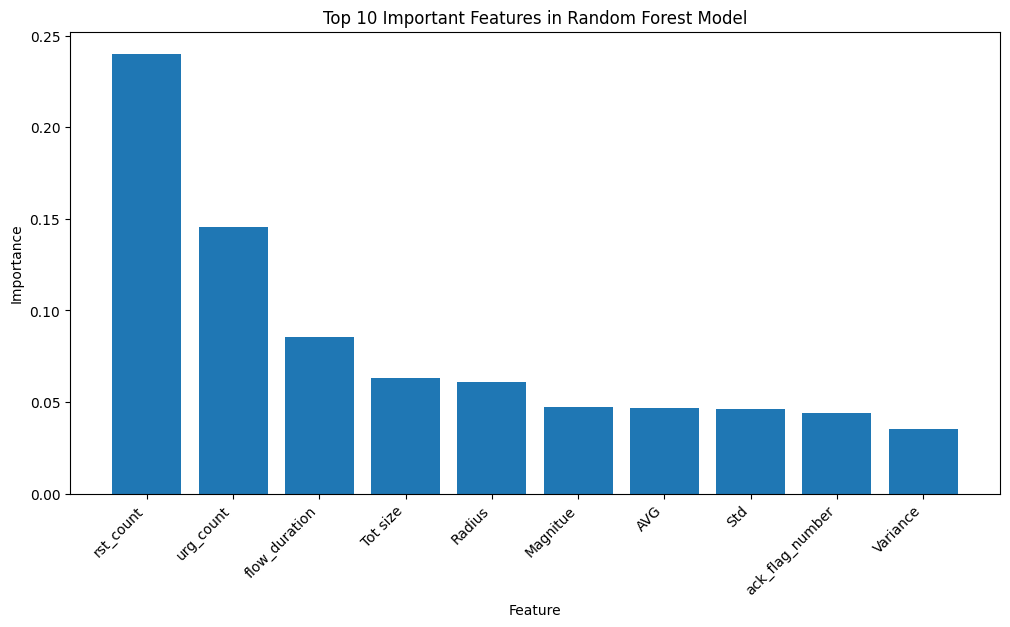

In [35]:

# Print the top features
print("Top 10 Important Features (Random Forest):")
print(feature_importance_df_rf.head(10))

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df_rf['Feature'][:10], feature_importance_df_rf['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()